Import all important stuff

In [1]:
import ssl

from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split


from bertopic.representation import KeyBERTInspired
import pandas as pd
import nltk
from datetime import datetime
from textblob import TextBlob
from textblob_de import TextBlobDE
from datasets import load_dataset

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import importlib
import functions


import nbconvert

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
from functions import *
importlib.reload(functions)


<module 'functions' from 'c:\\Users\\Jacob\\OneDrive\\uni\\MA WiSoz\\Semester III\\Computational Social Sciences\\foPra\\functions.py'>

Load all data 

In [3]:
parties = ["CDU", "SPD", "FDP", "AFD", "LEFT", "GREENS"]


file_path = "C:/Users/Jacob/OneDrive/uni/MA WiSoz/Semester III/Computational Social Sciences/foPra/data/"


In [4]:
# Define a dictionary to assign RGB colors to each party
party_colors = {
    "CDU": (0, 0, 0),         # Black
    "SPD": (255, 0, 0),       # Red
    "FDP": (235, 235, 20),     # Yellow
    "AFD": (135, 206, 250),   # Sky Blue
    "LEFT": (128, 0, 128),    # Purple
    "GREENS": (0, 128, 0)     # Green
}

In [5]:
# Load the DataFrame from a pickle file
df_manifesto = pd.read_pickle('Manifesto_final.pkl') 

In [7]:
spd_mani = pd.read_csv(file_path  + "parties\SPD_Manifesto.csv")

In [8]:
#topic_model = BERTopic.load("bertopic_model.pkl")
topic_model = BERTopic.load(file_path)


In [93]:
tm_df = topic_model.get_topic_info()

In [ ]:
with open("topics_over_time.pkl", "rb") as f:
    topics_over_time = pickle.load(f)

In [9]:
# Load the topics from a pickle file
topics = pd.read_pickle('topics.pkl')

# Load the probabilities from a pickle file
probs = pd.read_pickle('probs.pkl')

#df_manifesto["topic"] = topics


Next: filter topics and codes to automatically code the topics.

In [10]:
topics_filter = get_topics(df_manifesto, cmp_categories)


In [85]:
list_topic_409 = topics_filter["Keynesian Demand Management"]
df_subset_409 = tm_df[tm_df['Topic'].isin(list_topic_409)]

In [11]:
topic_model.get_document_info(df_manifesto["text"])

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,Düsseldorfer Leitsätze vom 15. Juli 1949 Das ...,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
1,In der ersten Hälfte des Jahres 1948 war der T...,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
2,Produktion und Arbeitsmoral waren auf ein Mini...,1,1_arbeitsbedingungen_arbeitnehmerinnen arbeitn...,"[arbeitsbedingungen, arbeitnehmerinnen arbeitn...",NaN,arbeitsbedingungen - arbeitnehmerinnen arbeitn...,False
3,"Der Kampf um die Ware, der ein Kampf gegen den...",-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
4,Die Korruption griff in erschreckendem Maße um...,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
...,...,...,...,...,...,...,...
95678,Und zu machen.,152,152_nan_nan nan_nan getan_nan etwa,"[nan, nan nan, nan getan, nan etwa, ei nan, na...",NaN,nan - nan nan - nan getan - nan etwa - ei nan ...,False
95679,Jetzt liegt es bei Ihnen.,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
95680,In Wahlen entscheidet eine Gesellschaft darübe...,30,30_wählerinnen wähler_wählerin lieber_lieber w...,"[wählerinnen wähler, wählerin lieber, lieber w...",NaN,wählerinnen wähler - wählerin lieber - lieber ...,False
95681,Wahlen sind ein Moment der Freiheit.,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False


In [ ]:
extract_topics(self, topic_model, documents, c_tf_idf, topics)


Inspect the data

In [96]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(df_manifesto["text"])


In [98]:
topic_model.visualize_hierarchy()

In [48]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,38779,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN
1,0,8594,0_kindern_kinderbetreuung_kindergeld_familien,"[kindern, kinderbetreuung, kindergeld, familie...",NaN
2,1,3254,1_arbeitsbedingungen_arbeitnehmerinnen arbeitn...,"[arbeitsbedingungen, arbeitnehmerinnen arbeitn...",NaN
3,2,2026,2_erneuerbaren energien_erneuerbar energien_au...,"[erneuerbaren energien, erneuerbar energien, a...",NaN
4,3,1986,3_sozial wohnungsbau_sozialen wohnungsbaus_soz...,"[sozial wohnungsbau, sozialen wohnungsbaus, so...",NaN
...,...,...,...,...,...
209,208,21,208_verbraucherschutzverbänd sollen_fördert ve...,"[verbraucherschutzverbänd sollen, fördert verb...",NaN
210,209,21,209_arbeitsmarkt steuerreform_steuerreform ent...,"[arbeitsmarkt steuerreform, steuerreform entbü...",NaN
211,210,21,210_verbesserung umweltpolitik_umweltpolitik s...,"[verbesserung umweltpolitik, umweltpolitik stä...",NaN
212,211,21,211_hoheitsverwaltung muß_möchten gesellschaft...,"[hoheitsverwaltung muß, möchten gesellschaftli...",NaN


Group and Compare Topics Across Parties
Your goal is to compare how political parties talk about different topics. You can:

Analyze topic distribution per party:

In [12]:
party_topic_counts = df_manifesto.groupby(["party", "topic"]).size().unstack().fillna(0)
party_topic_counts = party_topic_counts.div(df_manifesto.groupby("party")["party_count"].first(), axis=0).T


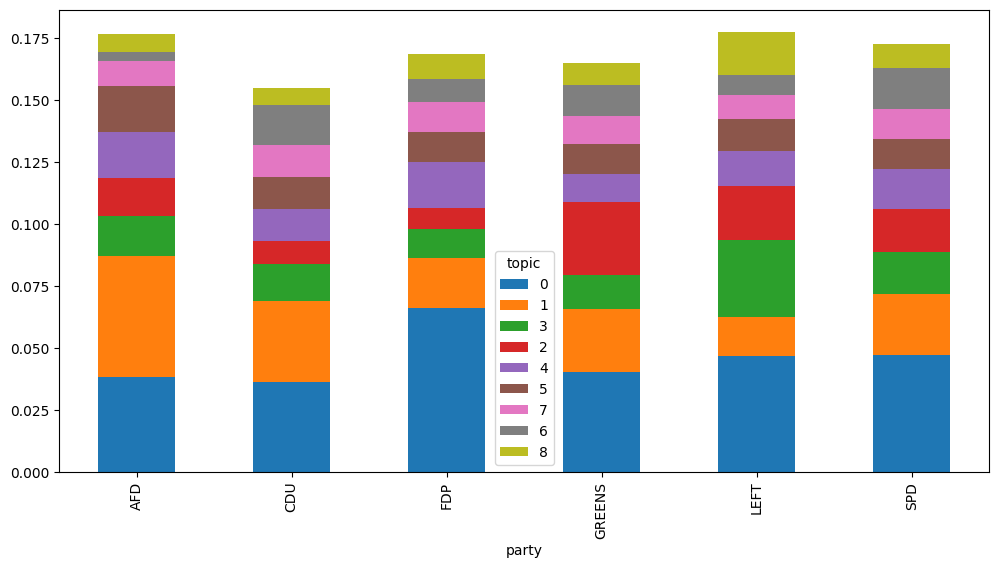

topic,0,1,3,2,4,5,7,6,8
party,,,,,,,,,
AFD,0.038415,0.048476,0.016159,0.015549,0.018598,0.018598,0.010061,0.003659,0.007317
CDU,0.036032,0.032706,0.015056,0.009473,0.012913,0.012631,0.013082,0.016014,0.007105
FDP,0.066203,0.019956,0.011924,0.008363,0.018673,0.011883,0.012297,0.009150,0.010185
GREENS,0.040180,0.025586,0.013480,0.029671,0.011103,0.012106,0.011549,0.012292,0.008801
LEFT,0.046531,0.016025,0.030922,0.021663,0.014125,0.012998,0.009852,0.008012,0.017449
SPD,0.047167,0.024740,0.016761,0.017422,0.016100,0.012040,0.011992,0.016619,0.009632


In [105]:
# Call the function
ptc_top3 = plot_top_topics(party_topic_counts, 9)
ptc_top3

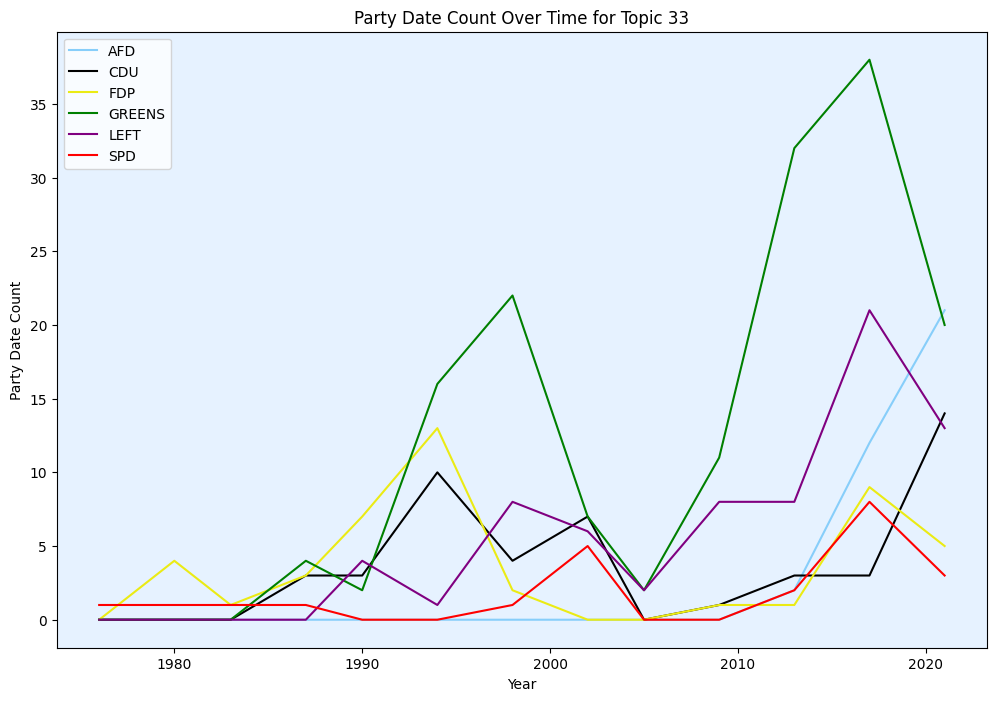

In [25]:
topic_per_party = filter_by_topic(df_manifesto, 33, party_colors)

In [26]:
df_filtered = df_manifesto[df_manifesto['topic'] == 5]
# df_filtered['party_date_count'] = df_filtered.groupby(['party', 'date'])['date'].transform('count')


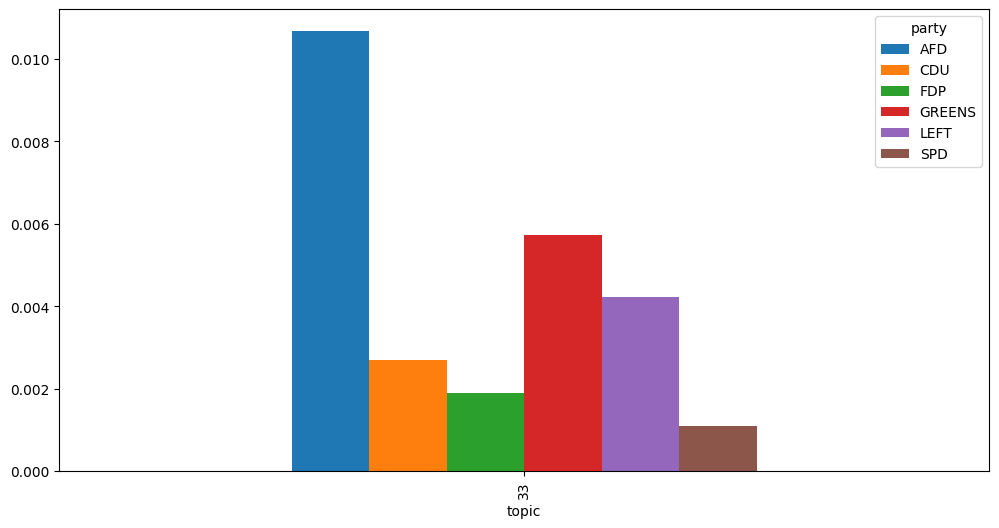

In [24]:
# Call the function with topic number 13
plot_topic_n_counts(party_topic_counts, 33)

Cluster topics into categories (e.g., Economy, Environment, Social Policy) using manual labeling or embeddings.

Analyze sentiment per topic & party (to see how parties frame topics differently):

- needs to be filtered for topic

In [27]:
df_filtered = df_manifesto[df_manifesto['topic'] == 33]


df_filtered["sentiment"] = df_filtered["text"].apply(lambda x: TextBlobDE(x).sentiment.polarity)


In [28]:
non_zero_sentiment_count = (df_filtered["sentiment"] != 0).sum()
non_zero_sentiment_count

175

In [30]:
cmp_cat = limit_to_cmp(df_manifesto, 400, 450)

df_pivot_cat = cmp_cat.pivot_table(index='date', columns='party', values='sentiment', aggfunc="mean").fillna(0)


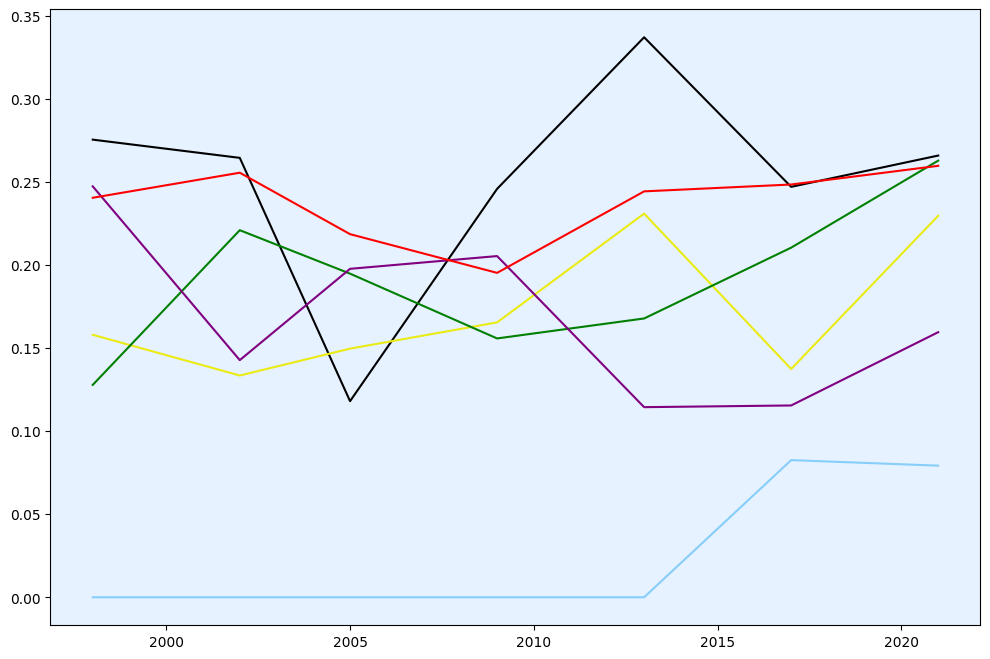

In [31]:
# Plot the data
plt.figure(figsize=(12, 8))
for party in df_pivot_cat.columns:
    # plt.plot(df_pivot.index, df_pivot[party], label=party)
    # if df_pivot[party].max() > 0:
    plt.plot(df_pivot_cat.index, df_pivot_cat[party], label=party, color=[c/255 for c in party_colors[party]])
    plt.gca().set_facecolor((0.9, 0.95, 1))  # Set background color to light grey/blue

Visualize Topic Evolution
Overlay different parties on a timeline to compare their topic distributions.
Heatmaps to show intensity of topics across parties and time

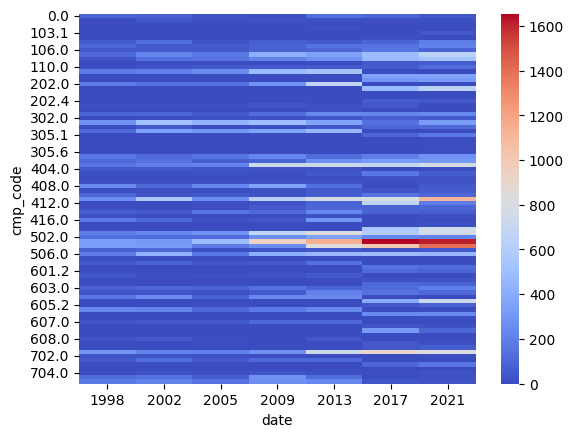

In [ ]:
# Assign each party a number based on the order in the parties list
party_mapping = {party: idx for idx, party in enumerate(parties)}
df_manifesto['party_number'] = df_manifesto['party'].map(party_mapping)

pivot = df_manifesto.pivot_table(index="cmp_code", columns="date", values="party", aggfunc="count")


# Plot the heatmap
sns.heatmap(pivot.fillna(0), cmap="coolwarm")
plt.show()


In [76]:
def plot_cmp_code_heatmap(df, category, log=True):
    """
    This function processes the given DataFrame to create a heatmap of cmp_code counts over time.

    Parameters:
    df_manifesto (pd.DataFrame): The input DataFrame containing 'cmp_code', 'date', and 'text' columns.

    Returns:
    None: Displays a heatmap.
    """
    # Ensure 'cmp_code' is numeric and drop rows with NaN values in 'cmp_code'
    df['cmp_code'] = pd.to_numeric(df['cmp_code'], errors='coerce')
    df_cleaned = df.dropna(subset=['cmp_code'])

    # Drop rows with invalid 'date' values
    df_cleaned = df_cleaned.dropna(subset=['date'])

    # Filter rows where the first digit of 'cmp_code' equals zero
    df_cleaned = df_cleaned[df_cleaned['cmp_code'].apply(lambda x: any(str(x).startswith(str(cat)) for cat in category))]

    # Create a pivot table with 'date' on x-axis and 'cmp_code' on y-axis
    df_cmp_code_count = df_cleaned.pivot_table(index='cmp_code', columns='date', values='text', aggfunc='count', fill_value=0)

    # Group rows by the integer part of 'cmp_code' and sum their values
    df_cmp_code_count = df_cmp_code_count.groupby(df_cmp_code_count.index.astype(int)).sum()


    # Calculate the logarithm of the values in df_cmp_code_count, adding 1 to avoid log(0)
    df_cmp_code_count_log = df_cmp_code_count.applymap(lambda x: np.log(x + 1))


    # Plot the heatmap
    sns.heatmap(df_cmp_code_count_log.fillna(0), cmap="coolwarm")
    plt.show()


    if log:
        return df_cmp_code_count_log
    else:
        return df_cmp_code_count

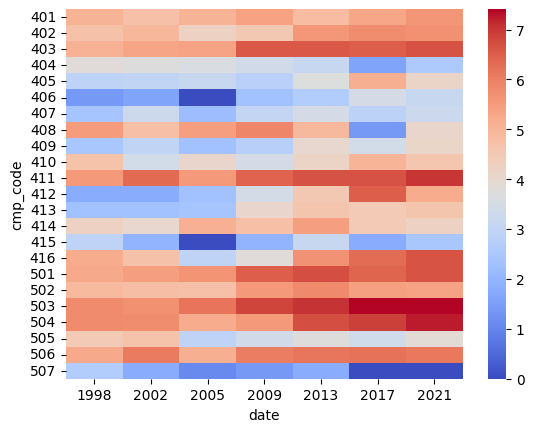

In [81]:
heatmap= plot_cmp_code_heatmap(df_manifesto, "45", False)

303 : call for more government efficiency. Agenda 2010

In [ ]:
# Filter the topics_over_time DataFrame to include only the top 10 topics
top_10_topics = topics_over_time.groupby('Topic').size().nlargest(10).index
filtered_topics_over_time = topics_over_time[topics_over_time['Topic'].isin(top_10_topics)]

# Visualisiere die Themenentwicklung
topic_model.visualize_topics_over_time(topics_over_time , topics=[1,2,3,4,5,6,7,8,9,10]
)